In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import pandas as pd
import pickle

In [2]:
mice = ["mpfc14", "mpfc19", "mpfc20", "mpfc23", "mpfc24", "mpfc30"]

In [3]:
img = []
for mi, mouse in enumerate(mice):
    imgs = []
    img_pil = Image.open("footprint/" + mouse + ".tif")
    for i in range(img_pil.n_frames):
        img_pil.seek(i)
        imgs.append(np.asarray(img_pil))
    img.append(np.array(imgs))

In [6]:
with open("w_single_Wlim001.pkl", "rb") as f:
    w = pickle.load(f)

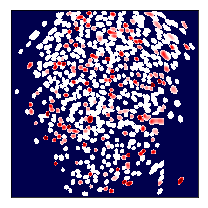

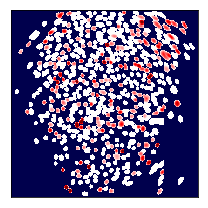

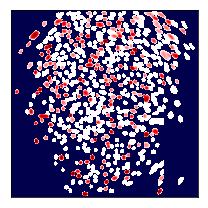

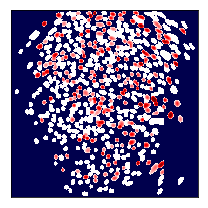

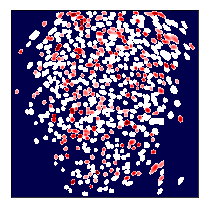

In [13]:
isum = img[4].sum(axis=0)
for i in range(5):
    plt.figure(figsize=(3, 3))
    plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    mu = w[4][2][i][:, 0].mean()
    vmax = mu + 3 * w[4][2][i][:, 0].std()
    wtmp = w[4][2][i][:, 0][:, np.newaxis, np.newaxis]
    wtmp[w[4][2][i][:, 0] < mu] = 0
    itmp = np.sum(img[4] * wtmp, axis=0)
    itmp[isum == 0] = -vmax
    mp = plt.pcolor(itmp, vmin=-vmax, vmax=vmax, cmap="seismic")
    plt.tight_layout()
    plt.savefig("paper/ext_fig4/footprint_mpfc24_day6_seq" + str(i) + ".png")
    plt.show()

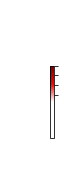

In [31]:
plt.figure(figsize=(1, 3))
cb = plt.colorbar(mp, ticks=[mu, (vmax-mu)/3+mu, 2*(vmax-mu)/3+mu, vmax])
cb.ax.set_ylim(0, vmax)
cb.ax.set_yticklabels(["" for _ in range(4)])
plt.axis("off")
plt.tight_layout()
plt.savefig("paper/ext_fig4/colorbar.png")